In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy.sparse import csr_matrix
from scipy.linalg import eig
from scipy.sparse.linalg import eigs, eigsh
from cuml.manifold.lanczos import eig_lanczos
from sklearn.utils.validation import check_symmetric
from scipy.sparse import random
from scipy.sparse.linalg import lobpcg
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import time

np.set_printoptions(precision=4, suppress=True, threshold=50)


# A = np.array([[-6.0, 3.0],
#               [4.0, 5.0]])

# A = np.array([[2.0, 0.0, 0.0],
#               [0.0, 4.0, 4.0],
#               [0.0, 4.0, 3.0]])

# B = np.zeros((4, 4))

# B[:3, :3] = A

# A = B
# A[3, 3] = 3


# rows = 20
# cols = 20
# sparse_matrix = random(rows, cols, density=0.02, random_state=42)
# sparse_matrix = sparse_matrix.astype(np.float32)
# print(sparse_matrix.dtype)
# A = sparse_matrix + sparse_matrix.T
# print(f"Sparsity: {(np.count_nonzero(A.toarray())) / (rows*cols):.0%}")
# print(A.dtype)

# eigenvalues, eigenvectors = eigsh(csr_matrix(A), k=3, which="SA", maxiter=10000, tol=0.01)
# dot = np.dot(eigenvectors[:, 0], eigenvectors[:, 1])
# print(f"\033[4meigsh()\033[0m\n")
# print("Eigenvalues:")
# print(eigenvalues)

# print("\nEigenvectors:")
# print(eigenvectors)
# print("dot", dot)

# r = np.random.RandomState(42)
# X0 = r.standard_normal(size=(rows, 3))
# eigenvalues, eigenvectors = lobpcg(csr_matrix(A), X=X0, largest=False, maxiter=10000, tol=0.01)
# dot = np.dot(eigenvectors[:, 0], eigenvectors[:, 1])
# print(f"\n\033[4mlobpcg()\033[0m\n")
# print("Eigenvalues:")
# print(eigenvalues)

# print("\nEigenvectors:")
# print(eigenvectors)
# print("dot", dot)
dists_double = {}
dists_float = {}

def solve(size, sparsity, maxiter, tol):
    dists_double_list = []
    dists_float_list = []
    rows = size
    cols = size
    sparse_matrix = random(rows, cols, density=sparsity, random_state=42)
    sparse_matrix = sparse_matrix.astype(np.float32)
    X = sparse_matrix + sparse_matrix.T
    eigenvalues, eigenvectors = eigsh(csr_matrix(X), k=6, which="SA", maxiter=1000, tol=tol)
    print(eigenvalues)
    print(eigenvectors)
    dot1, dot2, dot3 = np.dot(eigenvectors[:, 0], eigenvectors[:, 1]), np.dot(eigenvectors[:, 0], eigenvectors[:, 2]), np.dot(eigenvectors[:, 1], eigenvectors[:, 2])
    print(dot1, dot2, dot3)
    r = np.random.RandomState(42)
    X0 = r.standard_normal(size=(rows, 6))
    eigenvalues, eigenvectors = lobpcg(csr_matrix(X), X=X0, largest=False, maxiter=1000, tol=tol)
    print(eigenvalues)
    print(eigenvectors)
    dot1, dot2, dot3 = np.dot(eigenvectors[:, 0], eigenvectors[:, 1]), np.dot(eigenvectors[:, 0], eigenvectors[:, 2]), np.dot(eigenvectors[:, 1], eigenvectors[:, 2])
    print(dot1, dot2, dot3)
    print("maxiter", "eigenvalues_float - eigenvalues_double", "eigenvalues_float", "eigenvalues_double")
    for i in range(maxiter, maxiter+1):
        eigenvalues_double, eigenvectors_double, eig_iters_double = eig_lanczos(csr_matrix(X), 6, 123, dtype=np.float64, maxiter=i, tol=tol, conv_n_iters=4, conv_eps=0.0001, restartiter=400, handle=None)
        dot1_double, dot2_double, dot3_double = np.dot(eigenvectors_double[:, 0], eigenvectors_double[:, 1]), np.dot(eigenvectors_double[:, 0], eigenvectors_double[:, 2]), np.dot(eigenvectors_double[:, 1], eigenvectors_double[:, 2])
        
        eigenvalues_float, eigenvectors_float, eig_iters_float = eig_lanczos(csr_matrix(X), 6, 123, dtype=np.float32, maxiter=i, tol=tol, conv_n_iters=4, conv_eps=0.0001, restartiter=400, handle=None)
        dot1_float, dot2_float, dot3_float = np.dot(eigenvectors_float[:, 0], eigenvectors_float[:, 1]), np.dot(eigenvectors_float[:, 0], eigenvectors_float[:, 2]), np.dot(eigenvectors_float[:, 1], eigenvectors_float[:, 2])

        
        # dists_double_list.append(euclidean(eigenvalues, eigenvalues_double))
        # dists_float_list.append(euclidean(eigenvalues, eigenvalues_float))
        # print(i, eig_iters_float, eig_iters_double, eigenvalues_float, eigenvalues_double, np.array([dot1_float, dot2_float, dot3_float]), np.array([dot1_double, dot2_double, dot3_double]))
        time.sleep(1)
        print(i, eig_iters_double, eigenvalues_double, np.array([dot1_double, dot2_double, dot3_double]))
        print(i, eig_iters_float, eigenvalues_float, np.array([dot1_float, dot2_float, dot3_float]))

    dists_double[f"size={X.shape[0]}x{X.shape[1]}, sparsity={(np.count_nonzero(X.toarray())) / (rows*cols):.0%}, maxiter={maxiter}, tol={tol}"] = dists_double_list
    dists_float[f"size={X.shape[0]}x{X.shape[1]}, sparsity={(np.count_nonzero(X.toarray())) / (rows*cols):.0%}, maxiter={maxiter}, tol={tol}"] = dists_float_list
# solve(4, 0.1, 50, 0.01)
# solve(4, 0.1, 50, 1e-6)
# solve(4, 0.1, 50, 1e-9)
# solve(10, 0.1, 50, 0.01)
# solve(10, 0.1, 50, 1e-6)
# solve(10, 0.1, 10, 1e-9)
# solve(20, 0.02, 50, 0.01)
# solve(20, 0.02, 50, 1e-6)
# solve(20, 0.02, 10, 1e-9)
# solve(50, 0.02, 50, 0.01)
# solve(50, 0.02, 50, 1e-6)
# solve(50, 0.02, 50, 1e-9)
# solve(100, 0.02, 100, 1e-9)
# solve(100, 0.02, 50, 1e-6)
# solve(100, 0.02, 50, 1e-9)
# solve(1000, 0.02, 1000, 0.01)
# solve(1000, 0.02, 100, 1e-6)
# solve(1000, 0.02, 200, 1e-9)
# solve(10000, 0.02, 100, 0.01)
# solve(10000, 0.02, 100, 1e-6)
solve(10000, 0.04, 400, 1e-9)
# solve(100000, 0.02, 1000, 1e-9)

[-32.149  -32.0234 -32.0209 -31.987  -31.913  -31.8822]
[[-0.0068  0.0073  0.0062  0.0219 -0.005  -0.0138]
 [ 0.0037  0.0058 -0.0054  0.0039  0.0163  0.0042]
 [-0.0057 -0.0117 -0.0026 -0.0011  0.0014 -0.0027]
 ...
 [ 0.0028 -0.0138  0.0079  0.0082  0.0022 -0.014 ]
 [ 0.003  -0.0006 -0.0056  0.0028 -0.0123 -0.008 ]
 [-0.0041  0.008  -0.0019  0.0002 -0.0027 -0.0005]]
1.2739662e-07 1.7570824e-07 4.2549095e-07
[-32.1491 -32.0237 -32.0212 -31.9871 -31.913  -31.8822]
[[-0.0068 -0.0073 -0.0063 -0.0218 -0.005  -0.0138]
 [ 0.0037 -0.0059  0.0054 -0.0038  0.0163  0.0042]
 [-0.0057  0.0116  0.0026  0.001   0.0014 -0.0027]
 ...
 [ 0.0028  0.0139 -0.0077 -0.0083  0.0022 -0.014 ]
 [ 0.003   0.0005  0.0056 -0.0028 -0.0123 -0.008 ]
 [-0.0041 -0.008   0.0018 -0.0001 -0.0027 -0.0005]]
5.204170427930421e-18 1.3877787807814457e-17 -2.445960101127298e-16
maxiter eigenvalues_float - eigenvalues_double eigenvalues_float eigenvalues_double
seed 123
lanczos iteration=[-12.5353,21.3447,0,0,0,0];
0 2
lanczos ite

50 50 0.02729515920000001 0.13876231774447828 0.027295177200000006 0.13876227287280105 50 50


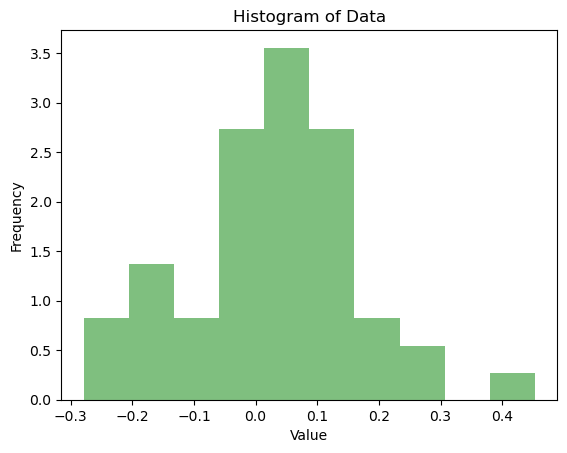

In [2]:
x = [0.00814527,-0.0322777,0.128713,0.218535,0.0175269,0.295599,0.15169,-0.0968857,0.080827,0.124244,0.208709,-0.221291,0.106242,0.18864,0.245091,-0.1449,0.0205416,-0.0566115,0.0525676,-0.0418374,-0.278677,0.0441465,-0.210701,0.0305678,0.0578765,0.0771878,-0.0728477,0.0158978,0.0833732,0.0282366,-0.144681,-0.0392782,-0.133525,0.0344093,0.453089,0.0950881,-0.0577823,-0.185295,0.0571196,-0.123562,0.0991152,0.149211,0.10402,0.102203,0.150593,-0.161939,-0.0414841,-0.0186015,0.0003884,-0.00265911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];
y = [0.00814527,-0.0322777,0.128713,0.218535,0.0175269,0.295599,0.15169,-0.0968857,0.0808269,0.124244,0.208709,-0.221291,0.106242,0.18864,0.245091,-0.1449,0.0205416,-0.0566115,0.0525676,-0.0418374,-0.278676,0.0441465,-0.210701,0.0305678,0.0578765,0.0771878,-0.0728477,0.0158978,0.0833732,0.0282366,-0.144681,-0.0392782,-0.133525,0.0344093,0.453089,0.0950881,-0.0577823,-0.185295,0.0571196,-0.123562,0.0991152,0.149211,0.10402,0.102203,0.150593,-0.161939,-0.0414841,-0.0186015,0.0003884,-0.00265911,8.40779e-45,9.80909e-45,1.12104e-44,1.26117e-44,1.4013e-44,1.54143e-44,1.68156e-44,1.82169e-44,1.96182e-44,2.10195e-44,2.24208e-44,2.38221e-44,2.52234e-44,2.66247e-44,2.8026e-44,2.94273e-44,3.08286e-44,3.22299e-44,3.36312e-44,3.50325e-44,3.64338e-44,3.78351e-44,3.92364e-44,4.06377e-44,4.2039e-44,4.34403e-44,4.48416e-44,4.62428e-44,4.76441e-44,4.90454e-44,5.04467e-44,5.1848e-44,5.32493e-44,5.46506e-44,5.60519e-44,5.74532e-44,5.88545e-44,6.02558e-44,6.16571e-44,6.30584e-44,6.44597e-44,6.5861e-44,6.72623e-44,6.86636e-44,7.00649e-44,7.14662e-44,7.28675e-44,7.42688e-44,7.56701e-44,7.70714e-44,7.84727e-44,7.9874e-44,8.12753e-44,8.26766e-44,8.40779e-44,8.54792e-44,8.68805e-44,8.82818e-44,8.96831e-44,9.10844e-44,9.24857e-44,9.3887e-44,9.52883e-44,9.66896e-44,9.80909e-44,9.94922e-44,1.00893e-43,1.02295e-43,1.03696e-43,1.05097e-43,1.06499e-43,1.079e-43,1.09301e-43,1.10703e-43,1.12104e-43,1.13505e-43,1.14906e-43,1.16308e-43,1.17709e-43,1.1911e-43,1.20512e-43,1.21913e-43,1.23314e-43,1.24716e-43,1.26117e-43,1.27518e-43,1.28919e-43,1.30321e-43,1.31722e-43,1.33123e-43,1.34525e-43,1.35926e-43,1.37327e-43,1.38729e-43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4013e-45,2.8026e-45,4.2039e-45,5.60519e-45,7.00649e-45,8.40779e-45,9.80909e-45,1.12104e-44,1.26117e-44,1.4013e-44,1.54143e-44,1.68156e-44,1.82169e-44,1.96182e-44,2.10195e-44,2.24208e-44,2.38221e-44,2.52234e-44,2.66247e-44,2.8026e-44,2.94273e-44,3.08286e-44,3.22299e-44,3.36312e-44,3.50325e-44,3.64338e-44,3.78351e-44,3.92364e-44,4.06377e-44,4.2039e-44,4.34403e-44,4.48416e-44,4.62428e-44,4.76441e-44,4.90454e-44,5.04467e-44,5.1848e-44,5.32493e-44,5.46506e-44,5.60519e-44,5.74532e-44,5.88545e-44,6.02558e-44,6.16571e-44,6.30584e-44,6.44597e-44,6.5861e-44,6.72623e-44,6.86636e-44,7.00649e-44,7.14662e-44,7.28675e-44,7.42688e-44,7.56701e-44,7.70714e-44,7.84727e-44,7.9874e-44,8.12753e-44,8.26766e-44,8.40779e-44,8.54792e-44,8.68805e-44,8.82818e-44,8.96831e-44,9.10844e-44,9.24857e-44,9.3887e-44,9.52883e-44,9.66896e-44,9.80909e-44,9.94922e-44,1.00893e-43,1.02295e-43,1.03696e-43,1.05097e-43,1.06499e-43,1.079e-43,1.09301e-43,1.10703e-43,1.12104e-43,1.13505e-43,1.14906e-43,1.16308e-43,1.17709e-43,1.1911e-43,1.20512e-43,1.21913e-43,1.23314e-43,1.24716e-43,1.26117e-43,1.27518e-43,1.28919e-43,1.30321e-43,1.31722e-43,1.33123e-43,1.34525e-43,1.35926e-43,1.37327e-43,1.38729e-43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];
x = x[:50]
y = y[:50]
print(len(y), len(x), np.mean(x), np.std(x), np.mean(y), np.std(y), np.count_nonzero(x), np.count_nonzero(y))
plt.hist(x, bins=10, density=True, alpha=0.5, color='g')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

dict_values([[85.06113394331045]])


/tmp/ipykernel_3472044/2048216439.py:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(0, x_limit)


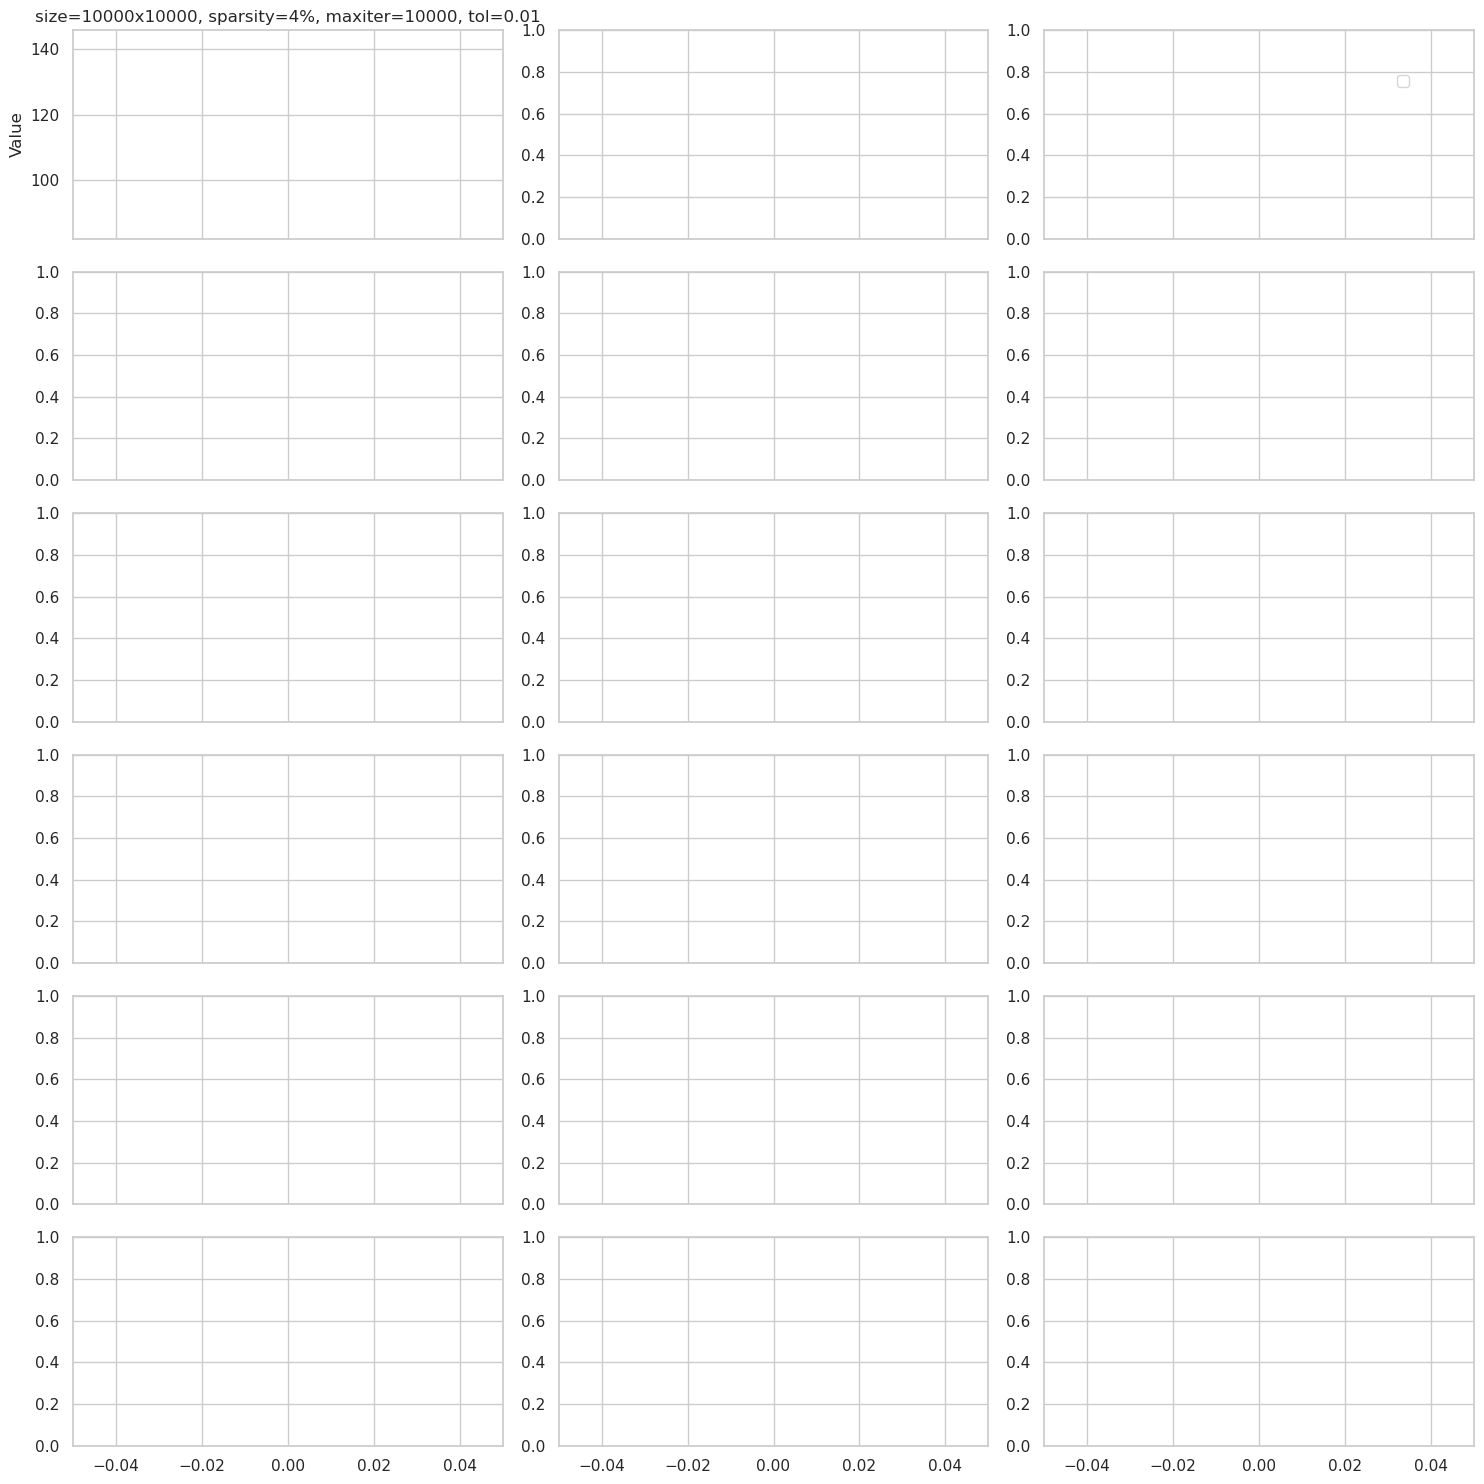

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap

# Check if both dicts have the same keys
assert set(dists_double.keys()) == set(dists_float.keys()), "Keys in dists_double and dists_float must match"
print(dists_float.values())
# Use Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axs = plt.subplots(6, 3, figsize=(15, 15), sharex=True)

# Flatten the axs array since we're iterating over a 2D grid
axs = axs.flatten()

# Plot each pair
for i, key in enumerate(dists_double.keys()):
    # Plot dists_double[key] and dists_float[key] on the i-th subplot
    sns.lineplot(x=np.arange(len(dists_double[key])), y=dists_double[key], ax=axs[i], label='Double')
    sns.lineplot(x=np.arange(len(dists_float[key])), y=dists_float[key], ax=axs[i], label='Float')

    # Set y-axis limits
    # axs[i].set_ylim(0, 1)

    # Set title and labels (wrap the title if needed)
    axs[i].set_title("\n".join(wrap(f"{key}", 60)))
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')

    # Calculate x-axis limits based on the length of data
    x_limit_double = len(dists_double[key]) - 1  # Adjust for zero-based indexing
    x_limit_float = len(dists_float[key]) - 1
    x_limit = max(x_limit_double, x_limit_float)
    axs[i].set_xlim(0, x_limit)

    # Remove legend from individual subplots as we'll create a single legend
    axs[i].legend().remove()

# Get handles and labels for the last subplot (assuming they are the same for all subplots)
handles, labels = axs[-1].get_legend_handles_labels()

# Create a single legend for the entire figure
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout()
plt.show()
